# Week3授業前課題2 住宅価格を予測しよう



## 【課題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
import pandas as pd
train_df = pd.read_csv('train.csv')

## 【課題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。前回扱ったirisデータセットとの比較もすると良いでしょう。

家の広さ、売値、築年数、付帯設備、面している道路などの情報が物件毎にまとまっているデータセット

## 【課題3】データの確認
「Week3授業前課題1アヤメを分析しよう」と同様に、データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


* 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [2]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


* 今回の目的変数はどの列か確認する。

SalePrice (家の売値)

* 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【課題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。


* 各特徴量の欠損値の有無を確認する。
欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

ResidentMario/missingno: Missing data visualization module for Python.


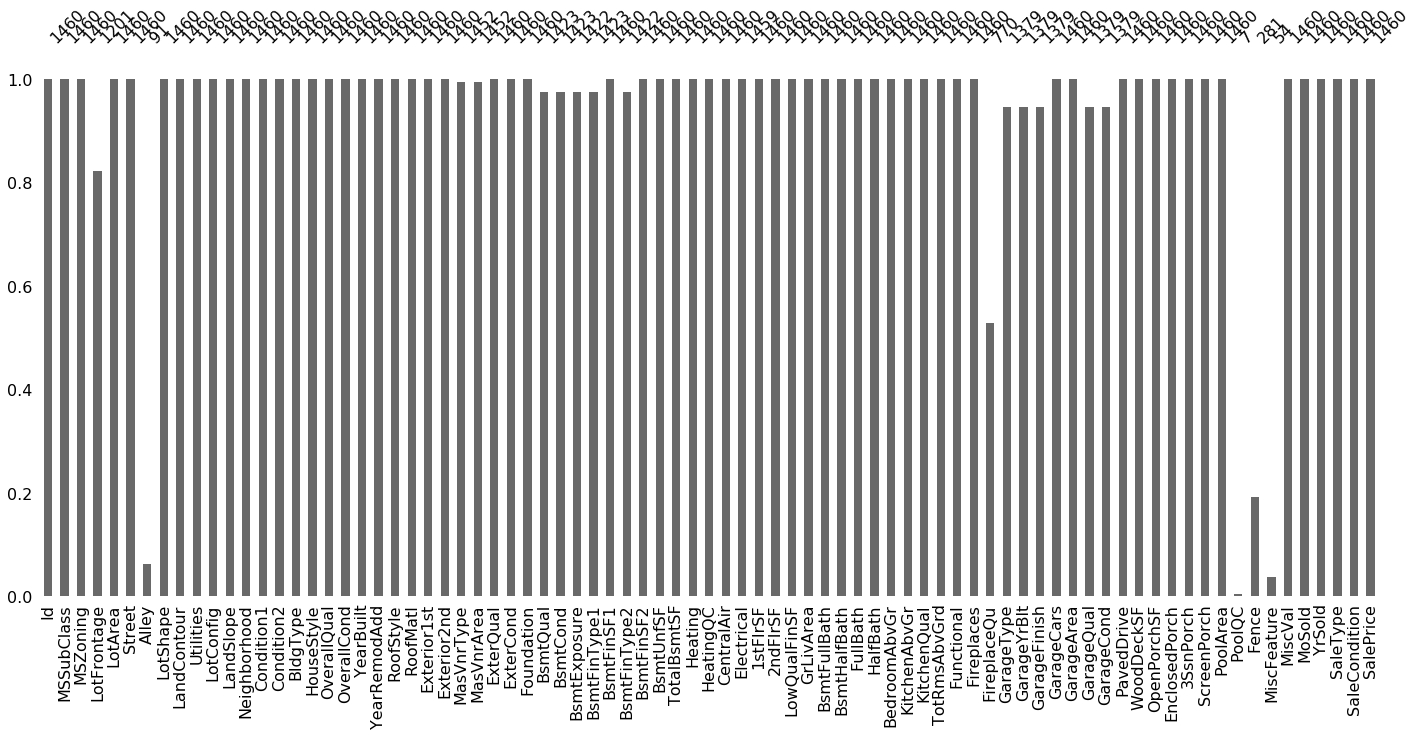

In [4]:
import missingno as msno
%matplotlib inline
msno.bar(train_df);

* 欠損値が何パーセント含まれるかを確認する。

In [5]:
isnull_train_df = train_df.isnull()
for col_name, item in isnull_train_df.iteritems():
    print("%s: %d percent data missing" % (col_name, sum(item)/len(item)*100))

Id: 0 percent data missing
MSSubClass: 0 percent data missing
MSZoning: 0 percent data missing
LotFrontage: 17 percent data missing
LotArea: 0 percent data missing
Street: 0 percent data missing
Alley: 93 percent data missing
LotShape: 0 percent data missing
LandContour: 0 percent data missing
Utilities: 0 percent data missing
LotConfig: 0 percent data missing
LandSlope: 0 percent data missing
Neighborhood: 0 percent data missing
Condition1: 0 percent data missing
Condition2: 0 percent data missing
BldgType: 0 percent data missing
HouseStyle: 0 percent data missing
OverallQual: 0 percent data missing
OverallCond: 0 percent data missing
YearBuilt: 0 percent data missing
YearRemodAdd: 0 percent data missing
RoofStyle: 0 percent data missing
RoofMatl: 0 percent data missing
Exterior1st: 0 percent data missing
Exterior2nd: 0 percent data missing
MasVnrType: 0 percent data missing
MasVnrArea: 0 percent data missing
ExterQual: 0 percent data missing
ExterCond: 0 percent data missing
Foundati

* 5つ以上欠損値がある特徴量（列）は削除する。

In [6]:
isnull_train_df = train_df.isnull()
null_col = []

#ColumnのNullが５以上のColumn名を保管
for col_name, item in isnull_train_df.iteritems():
    if (item.sum() > 5):
        null_col.append(col_name)
null_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
#Nullが５個以上の列をdrop
train_df = train_df.drop(null_col, axis=1)

* 欠損値があるサンプル（行）は削除する。  
列削除後のDataFrameに対し、nullがあるのは以下の項目なのでこれらを含む行が削除されることになる。  
Electrical:   0.068493 percent data missing

In [8]:
# nullのitemをTrueに、それ以外をFalseに
isnull_train_df = train_df.isnull()

# nullがある行のインデックスを格納していく
null_row_index = []

#DataFrameの行方向に対して、
#行番号をindexに、行の値をrowに代入
for index, row in isnull_train_df.iterrows():
    #rowが一つでもTrueならそのインデックス番号を記録する
    if (row.any() == True):
        null_row_index.append(index)

In [9]:
#一行だけNullがあると判明
null_row_index

[1379]

In [10]:
#削除および、削除後の列を確認
train_df = train_df.drop(null_row_index, axis=0)
train_df.loc[1376:1385, :]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1376,1377,30,RL,6292,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2008,WD,Normal,91000
1377,1378,50,RL,10998,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,117000
1378,1379,160,RM,1953,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,83000
1380,1381,30,RL,8212,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,96,0,0,0,0,6,2010,WD,Normal,58500
1381,1382,20,RL,12925,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,237500
1382,1383,70,RM,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,221,0,0,0,0,10,2006,WD,Normal,157000
1383,1384,30,RL,25339,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,8,2007,WD,Normal,112000
1384,1385,50,RL,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,105000
1385,1386,50,RM,5436,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,125500


## 【課題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

$n$個のデータの集合$x$に対して、標準偏差を$s$、平均値を$\bar{x}$とする。
* 尖度  
以下の式で表される。。  確率密度関数や頻度分布の鋭さを表す。尖度が大きいと尖った分布になる。この式では正規分布の尖度が3になる。
$$
\beta = \frac{1}{n}\sum_{i=1}^{n}{\Bigl(\frac{x_i - \bar{x}}{s}\Bigr)^4}
$$


* 歪度  
以下の式で表される。分布が正規分布からどれだけ歪んでいるかを表す統計量。左右対称性を示す指標。左に偏ると正の値、右に偏ると負の値をとる。  
$$
\gamma = \frac {1}{n} \sum_{i=1}^{n} \Bigl(\frac{x_i -\bar{x}}{s}\Bigr)^3
$$

In [11]:
#標準正規分布と尖度、歪度
import numpy as np

dst1 = np.random.normal(0, 1, 100000)
sns.distplot(dst1);

NameError: name 'sns' is not defined

In [ ]:
import scipy.stats as st

#正規分布の尖度と歪度
print("methodで計算")
print("Kurtosis: %f" % st.kurtosis(dst1))
print("Skewness: %f" % st.skew(dst1))

#尖度と歪度をstdevとmeanから算出
ndst_std = np.std(dst1)
ndst_mean = np.mean(dst1)
ndst_len = dst1.shape[0]

# 尖度
sgm_kurt = 0
for xi in dst1:
    sgm_kurt += ((xi - ndst_mean)/ndst_std)**4

kurtosis = (sgm_kurt/ndst_len) - 3

# 歪度
sgm_skew = 0
for xi in dst1:
    sgm_skew += ((xi - ndst_mean)/ndst_std)**3

skewness = sgm_skew/ndst_len

print("\nstdevとmeanから算出")
print("Kurtosis: %f" % kurtosis)
print("Skewness: %f" % skewness)

## 【課題6】分布の確認
* seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。  

In [ ]:
import seaborn as sns
sns.distplot(train_df.SalePrice);

In [ ]:
#尖度
print("Kurtosis: %f" % train_df['SalePrice'].kurt())
#歪度
print("Skewness: %f" % train_df['SalePrice'].skew())

* 目的変数に対して対数変換を行う。  

In [ ]:
# DataFrameにlog(SalePrice)を追加
train_df['SalePriceLog'] = np.log(train_df['SalePrice'])

* 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。  
対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

In [ ]:
sns.distplot(train_df['SalePriceLog']);

In [ ]:
print("Kurtosis: %f" % train_df['SalePriceLog'].kurt())
print("Skewness: %f" % train_df['SalePriceLog'].skew())

Logをとることで、分布が歪度がゼロに近づき正規分布に近い形になった。尖度も小さくなったがゼロではないので、裾野が狭く中央が尖った形になっている。  
一般に、正規分布  
$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\Bigl({-\frac{(x-\mu)^2}{2\sigma^2}}\Bigr)
$$  
に対して、$x=\log{t}$の関係が成り立つ時、$t$は対数正規分布に従う、という。　　
今回の結果から、厳密に$x=\log{t}$の関係になくても、歪度が大きい分布に対して対数をとることで正規分布に近い形に変換できると考えられる。  
この理由を考える。定義から、$x$の平均値$\mu$は
$$
\mu = \frac{1}{n}\sum_{i=1}^{n} {x_i}
=\frac{1}{n}\sum_{i=1}^{n} {\log{t_i}}
=\frac{1}{n}\log\prod_{i=1}^{n}{t_i}
$$
と表せるが、これより変数の相乗平均に意味がある場合に対数を取ると有効と考えられる。 

## 【課題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

* 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。  

In [ ]:
train_df_corr = train_df.corr()
train_df_corr

* 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。  

In [ ]:
sale_price_log_corr = train_df_corr['SalePriceLog'].sort_values(ascending=False)
sale_price_log_corr[0:10]


In [ ]:
#SalePriceは意味がないので削る
sale_price_log_corr = sale_price_log_corr.drop(['SalePrice'], axis=0)
sale_price_log_corr

In [ ]:
#SalePriceLogと、上位10の項目の相関係数を計算
train_df_corr = train_df[sale_price_log_corr[0:11].index].corr()
train_df_corr

* 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。  

| Feature | Description |
| :------: | :------: |
| SalePriceLog | log(SalePrice) |
| OverallQual | 家全体に関して、素材と仕上がりの十段階評価 (10: 最高, 1: 最低)|
| GrLivArea | 地上階のフロア面積の合計 (feet$^2$) |
| GarageCars | ガレージのサイズ（車の収納可能台数） |
| GarageArea | ガレージのサイズ（面積 feet$^2$） |
| TotalBsmtSF | 地下階のフロア面積の合計 (feet$^2$) |
| 1stFlrSF | 地上1階のフロア面積 (feet$^2$) |
| FullBath | 地上階にある風呂場数 |
| YearBuilt | 建築された年 |
| YearRemodAdd | リフォーム年（リフォームされていなければYearBuiltと同じ） |
| TotRmsAbvGrd | 地上階にある部屋数 （風呂場は除く） |


* 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。  

| Feature 1 | Feature 2 | Correlation | Discussion |
|:---|:---|:---|:---|
| GarageCars | GarageArea | 0.882613 |　車庫の面積が広ければ収容可能な車の台数も多そう（逆もまた然り） |
| GrLivArea | TotRmsAbvGrd | 0.825576 |　地上階の面積が大きければ、地上階の部屋数も多そう（逆もまた然り）　|
| 1stFlrSF | TotalBsmtSF | 0.819393 |　家の構造は上下の階でAreaは変わらなそう（上に行くにつれて大きくなるとか小さくなるとかはあまりなさそう）。地下階はだいたいB1階までしかないことが多いと思われるので、1Fと地下階の面積の相関が高いと思われる。|

Text(0, 0.5, 'GarageCars')

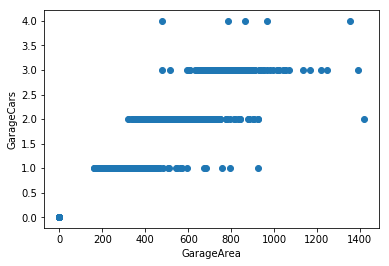

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x=train_df['GarageArea'], y=train_df['GarageCars'])
plt.xlabel('GarageArea')
plt.ylabel('GarageCars')


Text(0, 0.5, 'TotRmsAbvGrd')

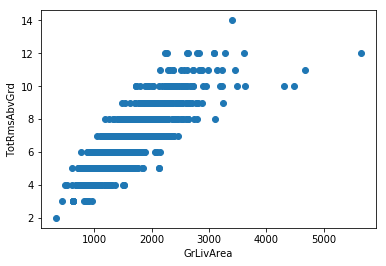

In [18]:
plt.scatter(x=train_df['GrLivArea'], y=train_df['TotRmsAbvGrd']);
plt.xlabel('GrLivArea')
plt.ylabel('TotRmsAbvGrd')

Text(0, 0.5, 'TotalBsmtSF')

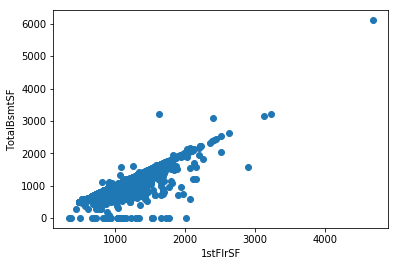

In [19]:
plt.scatter(x=train_df['1stFlrSF'], y=train_df['TotalBsmtSF']);
plt.xlabel('1stFlrSF')
plt.ylabel('TotalBsmtSF')

一直線上に乗っている点の集合は地下階がB1階までの家と思われる。1FとBasement Floorの面積がほぼ同じためだろうか。そこから外れているのは地下階がない家や、地下階が数Floarある家だろうか

## 【課題8】重要度の算出
ランダムフォレストという機械学習手法を用いることで、重要度の値を算出できます。この値は推定を行った時に、各特徴量がどれだけ推定値に寄与しているかを表すものです。ランダムフォレストは推定によく使われる手法ですが、ここでは推定自体が目的ではなく、あくまで重要度を算出するために使います

[参考](http://aiweeklynews.com/archives/50653819.html)

## 【課題9】さらなる探索
Kaggleのカーネルを参考に、ここまでの課題にないことにも挑戦し、ノートブックにまとめてください。